In [274]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report

In [275]:
df = pd.read_csv("Resources/movie_machine_learning.csv")
df

,all_genres,release_year,runtime,title,overview,tagline,budget,revenue,rating_tmdb,votes_tmdb,...,actors,plot,rating_imdb,votes_imdb,rating_rotten_tomatoes,rating_metacritic,rating_intranet,label_genre,label_language,label_origin
0,"Drama, Crime",1994,142,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,Fear can hold you prisoner. Hope can set you f...,25000000,28341469,9.0,24685,...,"Tim Robbins, Morgan Freeman, Bob Gunton","Over the course of several years, two convicts...",9.0,2802199.0,9.0,8.0,9.0,Crime,English,United States of America
1,"Drama, History, War",1993,195,Schindler's List,The true story of how businessman Oskar Schind...,"Whoever saves one life, saves the world entire.",22000000,321365567,9.0,14618,...,"Liam Neeson, Ralph Fiennes, Ben Kingsley","In German-occupied Poland during World War II,...",9.0,1404593.0,10.0,10.0,9.0,War,German,United States of America
2,"Animation, Action, Adventure",2023,140,Spider-Man: Across the Spider-Verse,"After reuniting with Gwen Stacy, Brooklyn’s fu...",It's how you wear the mask that matters.,100000000,683241751,8.0,4447,...,"Shameik Moore, Hailee Steinfeld, Brian Tyree H...","Miles Morales catapults across the Multiverse,...",9.0,252325.0,10.0,9.0,9.0,Animation,English,United States of America
3,"Animation, Family, Fantasy",2001,125,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...",NaN,19000000,274925095,9.0,14929,...,"Daveigh Chase, Suzanne Pleshette, Miyu Irino","During her family's move to the suburbs, a sul...",9.0,807746.0,10.0,10.0,9.0,Animation,Japanese,Japan
4,"Comedy, Thriller, Drama",2019,133,Parasite,"All unemployed, Ki-taek's family takes peculia...",Act like you own the place.,11363000,257591776,9.0,16448,...,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong",Greed and class discrimination threaten the ne...,8.0,891596.0,10.0,10.0,8.0,Thriller,English,South Korea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,"Horror, Mystery",2009,82,The Final Destination,After a young man's premonition of a deadly ra...,Rest In Pieces.,40000000,186167139,6.0,2962,...,"Nick Zano, Krista Allen, Andrew Fiscella",A horrifying premonition saves a young man and...,5.0,111703.0,3.0,3.0,5.0,Mystery,English,United States of America
4993,"Comedy, Romance",2021,92,Good on Paper,After years of putting her career ahead of lov...,"If he checks all your boxes, check again.",0,0,6.0,275,...,"Iliza Shlesinger, Britney Young, Christopher N...","After years of putting her career first, a sta...",6.0,13475.0,5.0,5.0,6.0,Romance,English,United States of America
4994,"Science Fiction, Drama, Adventure, Crime, Action",2019,86,See You Yesterday,As two teen prodigies try to master the art of...,Going back is the only way forward.,0,0,6.0,502,...,"Eden Duncan-Smith, Dante Crichlow, Astro","Two Brooklyn teenage prodigies, C.J. Walker an...",5.0,11378.0,9.0,7.0,5.0,Science Fiction,English,United States of America
4995,"Horror, Thriller",2014,97,Dark Was the Night,An evil is unleashed in a small town when a lo...,Evil's Roots Run Deep,0,0,6.0,231,...,"Kevin Durand, Lukas Haas, Bianca Kajlich",An evil is unleashed in a small town when a lo...,6.0,10805.0,5.0,4.0,6.0,Horror,English,United States of America


In [276]:
df.isna().sum()

all_genres                   0
release_year                 0
runtime                      0
title                        0
overview                     0
tagline                   1015
budget                       0
revenue                      0
rating_tmdb                  0
votes_tmdb                   0
awards                     742
director                     4
writer                       7
actors                       6
plot                         3
rating_imdb                  5
votes_imdb                   1
rating_rotten_tomatoes     818
rating_metacritic         1394
rating_intranet              5
label_genre                  0
label_language               0
label_origin                 0
dtype: int64

In [277]:
df.shape

(4997, 23)

In [278]:
df[df.duplicated()==True]

,all_genres,release_year,runtime,title,overview,tagline,budget,revenue,rating_tmdb,votes_tmdb,...,actors,plot,rating_imdb,votes_imdb,rating_rotten_tomatoes,rating_metacritic,rating_intranet,label_genre,label_language,label_origin


In [279]:
df["rating_metacritic"].value_counts()

6.0     799
5.0     627
7.0     626
8.0     525
4.0     490
9.0     207
3.0     199
2.0      67
10.0     59
1.0       4
Name: rating_metacritic, dtype: int64

In [280]:
df[df["rating_metacritic"].isna()==True]

,all_genres,release_year,runtime,title,overview,tagline,budget,revenue,rating_tmdb,votes_tmdb,...,actors,plot,rating_imdb,votes_imdb,rating_rotten_tomatoes,rating_metacritic,rating_intranet,label_genre,label_language,label_origin
8,"Action, Adventure, Animation, Drama",2019,85,Primal: Tales of Savagery,Genndy Tartakovsky's Primal: Tales of Savagery...,NaN,0,0,8.0,287,...,"Aaron LaPlante, Jon Olson",GENNDY TARTAKOVSKY'S PRIMAL - TALES OF SAVAGER...,8.0,2311.0,NaN,NaN,8.0,Animation,English,United States of America
9,"Romance, Animation",2016,61,Dou kyu sei – Classmates,"Rihito Sajo, an honor student with a perfect s...","Sincerely, Slowly, Falling in Love.",0,0,8.0,323,...,"Hideo Ishikawa, Hiroshi Kamiya, Kenji Nojima",A relationship between two high school second ...,8.0,3192.0,NaN,NaN,8.0,Animation,Japanese,Japan
14,"Romance, Drama",2020,105,Gabriel's Inferno: Part II,Professor Gabriel Emerson finally learns the t...,NaN,0,0,8.0,1484,...,"Giulio Berruti, James Andrew Fraser, Rhett Wel...",Professor Emerson learns the truth about Julia...,6.0,1322.0,NaN,NaN,6.0,Romance,Other,Other
21,Drama,2013,122,Hope,After 8-year-old So-won narrowly survives a br...,We won't let her shed tears again.,0,0,8.0,577,...,"Re Lee, Sol Kyung-gu, Uhm Ji-won",Story of an 8 year old girl coping with a grue...,8.0,9065.0,NaN,NaN,8.0,Drama,Korean,South Korea
22,"Comedy, Drama, Fantasy",2000,104,A Dog's Will,The lively João Grilo and the sly Chicó are po...,Lying with faith is not always a sin.,0,4903192,8.0,1011,...,"Matheus Nachtergaele, Selton Mello, Rogério Ca...",Follows the lives of 2 poor Brazilians and the...,9.0,16020.0,NaN,NaN,9.0,Fantasy,Portuguese,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,"Action, Thriller",1994,101,Drop Zone,"A daring prison break from an airliner at 30,0...",Taking crime to new heights,45000000,28735315,6.0,352,...,"Wesley Snipes, Gary Busey, Yancy Butler",A tough cop teams up with a professional skydi...,6.0,21214.0,4.0,NaN,6.0,Action,English,United States of America
4970,"Action, Thriller",2019,87,Trauma Center,Lt. Wakes is a vengeful police detective deter...,The enemy is closer than you think.,0,92968,6.0,345,...,"Nicky Whelan, Bruce Willis, Tito Ortiz","Alone and trapped in a locked-down hospital, a...",4.0,11739.0,2.0,NaN,4.0,Action,English,Other
4980,"Comedy, Crime, Drama",2017,97,El Camino Christmas,"A young man seeking a father he has never met,...","Bullets, beer, holiday cheer.",0,0,6.0,290,...,"Dax Shepard, Kurtwood Smith, Luke Grimes",Eric comes to El Camino looking for his unknow...,6.0,9949.0,4.0,NaN,6.0,Crime,English,United States of America
4981,Comedy,2016,94,The Tuche Family: The American Dream,"Les Tuche, a modest french family, change his ...",NaN,0,0,6.0,911,...,"Jean-Paul Rouve, Isabelle Nanty, Claire Nadeau","The Tuches' youngest son, Donald, goes to the ...",5.0,1778.0,NaN,NaN,5.0,Comedy,French,France


In [281]:
clean_df = df[df["rating_metacritic"].isna()!=True]

In [282]:
clean_df.isna().sum()

all_genres                  0
release_year                0
runtime                     0
title                       0
overview                    0
tagline                   362
budget                      0
revenue                     0
rating_tmdb                 0
votes_tmdb                  0
awards                    315
director                    0
writer                      0
actors                      0
plot                        0
rating_imdb                 0
votes_imdb                  0
rating_rotten_tomatoes     94
rating_metacritic           0
rating_intranet             0
label_genre                 0
label_language              0
label_origin                0
dtype: int64

In [283]:
df = df.dropna(how = "any")
df.shape

(2887, 23)

In [284]:
df.nunique()

all_genres                 936
release_year                93
runtime                    128
title                     2848
overview                  2887
tagline                   2883
budget                     381
revenue                   2402
rating_tmdb                  4
votes_tmdb                1947
awards                    1164
director                  1674
writer                    2663
actors                    2864
plot                      2886
rating_imdb                  6
votes_imdb                2861
rating_rotten_tomatoes      11
rating_metacritic           10
rating_intranet              6
label_genre                 17
label_language              15
label_origin                20
dtype: int64

In [285]:
all_genres = df["all_genres"].value_counts()
all_genres[all_genres < 2]

Fantasy, Action, Thriller                   1
Western, Adventure                          1
Drama, Family, Fantasy                      1
Family, Animation                           1
Drama, Action, Thriller                     1
                                           ..
Drama, Music, Family                        1
Comedy, Drama, Crime, Thriller              1
Thriller, Science Fiction, Drama, Horror    1
Comedy, Romance, Music                      1
Adventure, Comedy, Family, Romance          1
Name: all_genres, Length: 607, dtype: int64

In [286]:
df["label_genre"].value_counts()

Crime              351
Romance            313
Mystery            288
Science Fiction    259
Comedy             220
Fantasy            207
Horror             206
Drama              185
Animation          185
History            115
War                111
Adventure           98
Music               92
Action              74
Thriller            63
Family              63
Other               57
Name: label_genre, dtype: int64

In [287]:
df[df["label_genre"]=="Other"].head()

,all_genres,release_year,runtime,title,overview,tagline,budget,revenue,rating_tmdb,votes_tmdb,...,actors,plot,rating_imdb,votes_imdb,rating_rotten_tomatoes,rating_metacritic,rating_intranet,label_genre,label_language,label_origin
7,Western,1966,161,"The Good, the Bad and the Ugly",While the Civil War rages on between the Union...,For three men the Civil War wasn't hell. It wa...,1200000,38900000,8.0,7761,...,"Clint Eastwood, Eli Wallach, Lee Van Cleef",A bounty hunting scam joins two men in an unea...,9.0,787886.0,10.0,9.0,9.0,Other,Italian,United States of America
83,"Drama, Western",2012,165,Django Unchained,"With the help of a German bounty hunter, a fre...","Life, liberty and the pursuit of vengeance.",100000000,425368238,8.0,24693,...,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio","With the help of a German bounty-hunter, a fre...",8.0,1631030.0,9.0,8.0,8.0,Other,English,United States of America
146,Western,1965,132,For a Few Dollars More,"Two bounty hunters are in pursuit of ""El Indio...",The man with no name is back... the man in bla...,600000,15000000,8.0,3558,...,"Clint Eastwood, Lee Van Cleef, Gian Maria Volontè",Two bounty hunters with the same intentions te...,8.0,267377.0,9.0,7.0,8.0,Other,Italian,Germany
159,"Adventure, Drama, Western",1948,126,The Treasure of the Sierra Madre,"Fred C. Dobbs and Bob Curtin, both down on the...","The nearer they get to their treasure, the far...",3800000,4307000,8.0,1066,...,"Humphrey Bogart, Walter Huston, Tim Holt",Two down-on-their-luck Americans searching for...,8.0,129842.0,10.0,10.0,8.0,Other,English,United States of America
217,Western,1992,130,Unforgiven,"William Munny is a retired, once-ruthless kill...",Some legends will never be forgotten. Some wro...,14400000,159157447,8.0,3966,...,"Clint Eastwood, Gene Hackman, Morgan Freeman",Retired Old West gunslinger William Munny relu...,8.0,426855.0,10.0,8.0,8.0,Other,English,United States of America


In [288]:
df.head(1)

,all_genres,release_year,runtime,title,overview,tagline,budget,revenue,rating_tmdb,votes_tmdb,...,actors,plot,rating_imdb,votes_imdb,rating_rotten_tomatoes,rating_metacritic,rating_intranet,label_genre,label_language,label_origin
0,"Drama, Crime",1994,142,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,Fear can hold you prisoner. Hope can set you f...,25000000,28341469,9.0,24685,...,"Tim Robbins, Morgan Freeman, Bob Gunton","Over the course of several years, two convicts...",9.0,2802199.0,9.0,8.0,9.0,Crime,English,United States of America


In [289]:
genre_list = list(set(df["all_genres"].str.cat(sep=", ").split(",")))
genre_list = list(set([genre.replace(" ","" )for genre in genre_list]))
genre_list

['Mystery',
 'Thriller',
 'ScienceFiction',
 'Horror',
 'Fantasy',
 'TVMovie',
 'Comedy',
 'Family',
 'Drama',
 'Action',
 'War',
 'History',
 'Adventure',
 'Animation',
 'Crime',
 'Western',
 'Music',
 'Romance']

In [290]:
genre_action = []
genre_adventure = []
genre_horror = []
genre_crime = []
genre_fantasy = []
genre_tvmovie = []
genre_drama = []
genre_thriller = []
genre_romance = []
genre_mystery = []
genre_history = []
genre_western = []
genre_sciencefiction = []
genre_war = []
genre_family = []
genre_comedy = []
genre_music = []

for i in range(len(df)):

    if "Action" in df.iloc[i]["all_genres"]:
        genre_action.append(1)
    else:
        genre_action.append(0)

    if "Adventure" in df.iloc[i]["all_genres"]:
        genre_adventure.append(1)
    else:
        genre_adventure.append(0)

    if "Horror" in df.iloc[i]["all_genres"]:
        genre_horror.append(1)
    else:
        genre_horror.append(0)

    if "Crime" in df.iloc[i]["all_genres"]:
        genre_crime.append(1)
    else:
        genre_crime.append(0)

    if "Fantasy" in df.iloc[i]["all_genres"]:
        genre_fantasy.append(1)
    else:
        genre_fantasy.append(0)

    if "TVMovie" in df.iloc[i]["all_genres"]:
        genre_tvmovie.append(1)
    else:
        genre_tvmovie.append(0)

    if "Drama" in df.iloc[i]["all_genres"]:
        genre_drama.append(1)
    else:
        genre_drama.append(0)

    if "Thriller" in df.iloc[i]["all_genres"]:
        genre_thriller.append(1)
    else:
        genre_thriller.append(0)

    if "Romance" in df.iloc[i]["all_genres"]:
        genre_romance.append(1)
    else:
        genre_romance.append(0)

    if "Mystery" in df.iloc[i]["all_genres"]:
        genre_mystery.append(1)
    else:
        genre_mystery.append(0)

    if "History" in df.iloc[i]["all_genres"]:
        genre_history.append(1)
    else:
        genre_history.append(0)

    if "Western" in df.iloc[i]["all_genres"]:
        genre_western.append(1)
    else:
        genre_western.append(0)

    if "ScienceFiction" in df.iloc[i]["all_genres"]:
        genre_sciencefiction.append(1)
    else:
        genre_sciencefiction.append(0)

    if "War" in df.iloc[i]["all_genres"]:
        genre_war.append(1)
    else:
        genre_war.append(0)
    
    if "Family" in df.iloc[i]["all_genres"]:
        genre_family.append(1)
    else:
        genre_family.append(0)

    if "Comedy" in df.iloc[i]["all_genres"]:
        genre_comedy.append(1)
    else:
        genre_comedy.append(0)

    if "Music" in df.iloc[i]["all_genres"]:
        genre_music.append(1)
    else:
        genre_music.append(0)
    

In [291]:
df["Is Action"] = genre_action
df["Is Adventure"] = genre_adventure
df["Is Horror"] = genre_horror
df["Is Crime"] = genre_crime
df["Is Fantasy"] = genre_fantasy
df["Is TVMovie"] = genre_tvmovie
df["Is Drama"] = genre_drama
df["Is Thriller"] = genre_thriller
df["Is Romance"] = genre_romance
df["Is Mystery"] = genre_mystery
df["Is Western"] = genre_western
df["Is ScienceFiction"] = genre_sciencefiction
df["Is War"] = genre_war
df["Is Family"] = genre_family
df["Is Comedy"] = genre_comedy
df["Is Music"] = genre_music

df.head()

C:\Users\Ana Torres\AppData\Local\Temp\ipykernel_5080\1491020512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Is Action"] = genre_action
C:\Users\Ana Torres\AppData\Local\Temp\ipykernel_5080\1491020512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Is Adventure"] = genre_adventure
C:\Users\Ana Torres\AppData\Local\Temp\ipykernel_5080\1491020512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,all_genres,release_year,runtime,title,overview,tagline,budget,revenue,rating_tmdb,votes_tmdb,...,Is Drama,Is Thriller,Is Romance,Is Mystery,Is Western,Is ScienceFiction,Is War,Is Family,Is Comedy,Is Music
0,"Drama, Crime",1994,142,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,Fear can hold you prisoner. Hope can set you f...,25000000,28341469,9.0,24685,...,1,0,0,0,0,0,0,0,0,0
1,"Drama, History, War",1993,195,Schindler's List,The true story of how businessman Oskar Schind...,"Whoever saves one life, saves the world entire.",22000000,321365567,9.0,14618,...,1,0,0,0,0,0,1,0,0,0
2,"Animation, Action, Adventure",2023,140,Spider-Man: Across the Spider-Verse,"After reuniting with Gwen Stacy, Brooklyn’s fu...",It's how you wear the mask that matters.,100000000,683241751,8.0,4447,...,0,0,0,0,0,0,0,0,0,0
4,"Comedy, Thriller, Drama",2019,133,Parasite,"All unemployed, Ki-taek's family takes peculia...",Act like you own the place.,11363000,257591776,9.0,16448,...,1,1,0,0,0,0,0,0,1,0
5,"Drama, Action, Crime, Thriller",2008,152,The Dark Knight,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,185000000,1004558444,9.0,30654,...,1,1,0,0,0,0,0,0,0,0


In [292]:
df = df[["budget","revenue","votes_tmdb", "release_year", "Is Action", "Is Adventure", "Is Horror", "Is Crime", "Is Fantasy", "Is TVMovie", 
    "Is Drama", "Is Thriller", "Is Romance", "Is Mystery", "Is Western", "Is ScienceFiction", 
    "Is War", "Is Family", "Is Comedy", "Is Music", "rating_tmdb"]]

df.head()

,budget,revenue,votes_tmdb,release_year,Is Action,Is Adventure,Is Horror,Is Crime,Is Fantasy,Is TVMovie,...,Is Thriller,Is Romance,Is Mystery,Is Western,Is ScienceFiction,Is War,Is Family,Is Comedy,Is Music,rating_tmdb
0,25000000,28341469,24685,1994,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9.0
1,22000000,321365567,14618,1993,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9.0
2,100000000,683241751,4447,2023,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.0
4,11363000,257591776,16448,2019,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,9.0
5,185000000,1004558444,30654,2008,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,9.0


In [297]:
y = df["rating_tmdb"]
X = df.drop(columns = "rating_tmdb")
X_train, X_test, y_train, y_test, = train_test_split(X, y, random_state = 7)

In [298]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [293]:
df_ratings_by_year = df[["release_year", "rating_tmdb"]].groupby("release_year").mean()
df_ratings_by_year

,rating_tmdb
release_year,
1916,7.000000
1925,8.000000
1927,8.000000
1930,8.000000
1931,7.500000
...,...
2019,6.843750
2020,6.676471
2021,6.936709


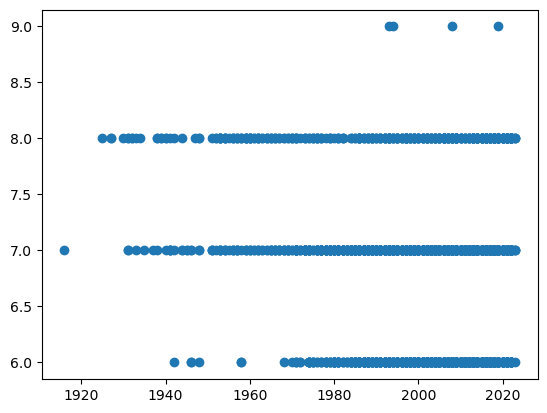

In [294]:
plt.scatter(x=df["release_year"], y=df["rating_tmdb"])

# Regressors

In [ ]:
# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
model_predictions = model.predict(X_test_scaled)

print(f"R2: {r2_score(y_test,model_predictions)}")
print(f"MSE: {mean_squared_error(y_test, model_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, model_predictions))}")

R2: 0.22100095750261228
MSE: 0.35933535800407146
RMSE: 0.599445875792028


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
model_predictions = model.predict(X_test_scaled)

print(f"R2: {r2_score(y_test,model_predictions)}")
print(f"MSE: {mean_squared_error(y_test, model_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, model_predictions))}")

R2: 0.32788455898559843
MSE: 0.310032271468144
RMSE: 0.5568054161627237


In [ ]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train_scaled, y_train)
model_predictions = model.predict(X_test_scaled)

print(f"R2: {r2_score(y_test,model_predictions)}")
print(f"MSE: {mean_squared_error(y_test, model_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, model_predictions))}")

R2: 0.29549173864765843
MSE: 0.324974376731302
RMSE: 0.5700652390133097


In [ ]:
# Lasso
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train_scaled, y_train)
model_predictions = model.predict(X_test_scaled)

print(f"R2: {r2_score(y_test,model_predictions)}")
print(f"MSE: {mean_squared_error(y_test, model_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, model_predictions))}")

R2: -0.005772919671866994
MSE: 0.46394122770992036
RMSE: 0.6811323129245304


In [ ]:
# Ridge
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train_scaled, y_train)
model_predictions = model.predict(X_test_scaled)

print(f"R2: {r2_score(y_test,model_predictions)}")
print(f"MSE: {mean_squared_error(y_test, model_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, model_predictions))}")

R2: 0.2210763580104924
MSE: 0.35930057738559223
RMSE: 0.5994168644487676


In [ ]:
# Ridge
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X_train_scaled, y_train)
model_predictions = model.predict(X_test_scaled)

print(f"R2: {r2_score(y_test,model_predictions)}")
print(f"MSE: {mean_squared_error(y_test, model_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, model_predictions))}")

R2: 0.21844874570096928
MSE: 0.36051263793821037
RMSE: 0.600427046308051


In [ ]:
# Distribution of ratings for all movies
y_test.value_counts()

7.0    336
6.0    294
8.0     91
9.0      1
Name: rating_tmdb, dtype: int64

# Classifiers

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
model_predictions = model.predict(X_test_scaled)

print(confusion_matrix(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

[[183 111   0   0]
 [ 82 237  17   0]
 [  4  61  26   0]
 [  0   0   1   0]]
              precision    recall  f1-score   support

         6.0       0.68      0.62      0.65       294
         7.0       0.58      0.71      0.64       336
         8.0       0.59      0.29      0.39        91
         9.0       0.00      0.00      0.00         1

    accuracy                           0.62       722
   macro avg       0.46      0.40      0.42       722
weighted avg       0.62      0.62      0.61       722



c:\Users\Ana Torres\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ana Torres\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ana Torres\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# SVC
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_scaled, y_train)
model_predictions = model.predict(X_test_scaled)

print(confusion_matrix(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

[[172 122   0   0]
 [ 77 242  17   0]
 [  7  70  14   0]
 [  0   0   1   0]]
              precision    recall  f1-score   support

         6.0       0.67      0.59      0.63       294
         7.0       0.56      0.72      0.63       336
         8.0       0.44      0.15      0.23        91
         9.0       0.00      0.00      0.00         1

    accuracy                           0.59       722
   macro avg       0.42      0.36      0.37       722
weighted avg       0.59      0.59      0.58       722



c:\Users\Ana Torres\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ana Torres\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ana Torres\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
model_predictions = model.predict(X_test_scaled)

print(confusion_matrix(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

[[190 102   2   0]
 [120 198  18   0]
 [ 20  60  11   0]
 [  0   0   1   0]]
              precision    recall  f1-score   support

         6.0       0.58      0.65      0.61       294
         7.0       0.55      0.59      0.57       336
         8.0       0.34      0.12      0.18        91
         9.0       0.00      0.00      0.00         1

    accuracy                           0.55       722
   macro avg       0.37      0.34      0.34       722
weighted avg       0.53      0.55      0.54       722



c:\Users\Ana Torres\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ana Torres\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ana Torres\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
model_predictions = model.predict(X_test_scaled)

print(confusion_matrix(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

[[174 120   0   0]
 [ 83 227  26   0]
 [  5  70  16   0]
 [  0   0   1   0]]
              precision    recall  f1-score   support

         6.0       0.66      0.59      0.63       294
         7.0       0.54      0.68      0.60       336
         8.0       0.37      0.18      0.24        91
         9.0       0.00      0.00      0.00         1

    accuracy                           0.58       722
   macro avg       0.40      0.36      0.37       722
weighted avg       0.57      0.58      0.57       722



c:\Users\Ana Torres\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ana Torres\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ana Torres\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score